In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
# Google developer API key
from config import gkey
import gmaps

#Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:
#import starter data from CleanDatasets folder
wuhan=pd.read_csv("CleanDatasets/wuhan_AQI.csv")
delhi=pd.read_csv("CleanDatasets/delhi_AQI.csv")
london=pd.read_csv("CleanDatasets/london_AQI.csv")
diepkloof=pd.read_csv("CleanDatasets/diepkloof_AQI.csv")

In [3]:
#convert 'date' datatype to datetime
london['date'] = pd.to_datetime(london['date'])
wuhan['date'] = pd.to_datetime(wuhan['date'])
delhi['date'] = pd.to_datetime(delhi['date'])
diepkloof['date'] = pd.to_datetime(diepkloof['date'])

In [4]:
#add 'month' column
london['month'] = london['date'].dt.month
wuhan['month'] = wuhan['date'].dt.month
delhi['month'] = delhi['date'].dt.month
diepkloof['month'] = diepkloof['date'].dt.month

In [5]:
#add 'day' column
london['day'] = london['date'].dt.day
wuhan['day'] = wuhan['date'].dt.day
delhi['day'] = delhi['date'].dt.day
diepkloof['day'] = diepkloof['date'].dt.day

In [6]:
#add 'year' column
london['year'] = london['date'].dt.year
wuhan['year'] = wuhan['date'].dt.year
delhi['year'] = delhi['date'].dt.year
diepkloof['year'] = diepkloof['date'].dt.year

In [7]:
#add 'month_day' column
london["month_day"] = london["date"].dt.strftime("%m-%d")
wuhan["month_day"] = wuhan["date"].dt.strftime("%m-%d")
delhi["month_day"] = delhi["date"].dt.strftime("%m-%d")
diepkloof["month_day"] = diepkloof["date"].dt.strftime("%m-%d")

In [8]:
# Create the bins in which Data will be held  
bins = [0, 50, 100, 150, 200, 300,500]
# Create the names for the five bins
group_names = ["good", "moderate", "unhealthySG", "unhealthy", "very unhealthy","hazardous"]

In [9]:
#add 'health level' column
diepkloof["health level"] = pd.cut(diepkloof["AQI"], bins, labels=group_names, include_lowest=True)
wuhan["health level"] = pd.cut(wuhan["AQI"], bins, labels=group_names, include_lowest=True)
london["health level"] = pd.cut(london["AQI"], bins, labels=group_names, include_lowest=True)
delhi["health level"] = pd.cut(delhi["AQI"], bins, labels=group_names, include_lowest=True)

In [10]:
#set lockdown period dataframes (based on Wikipedia)
wuhan_lockdown20=wuhan[(wuhan['date']>='2020-01-23')&(wuhan['date']<='2020-04-08')]
wuhan_lockdown19=wuhan[(wuhan['date']>='2019-01-23')&(wuhan['date']<='2019-04-08')]

delhi_lockdown20=delhi[(delhi['date']>='2020-03-23')&(delhi['date']<='2020-05-31')]
delhi_lockdown19=delhi[(delhi['date']>='2019-03-23')&(delhi['date']<='2019-05-31')]

london_lockdown20=london[(london['date']>='2020-03-23')&(london['date']<='2020-05-10')]
london_lockdown19=london[(london['date']>='2019-03-23')&(london['date']<='2019-05-10')]

diepkloof_lockdown20=diepkloof[(diepkloof['date']>='2020-03-26')&(diepkloof['date']<='2020-04-30')]
diepkloof_lockdown19=diepkloof[(diepkloof['date']>='2019-03-26')&(diepkloof['date']<='2019-04-30')]

In [11]:
#sample data
wuhan_lockdown20.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,month,day,year,month_day,health level
378,2020-01-23,173,71,21,12,3,12,173,1,23,2020,01-23,unhealthy
379,2020-01-24,174,39,28,7,2,5,174,1,24,2020,01-24,unhealthy
380,2020-01-25,116,46,23,7,2,7,116,1,25,2020,01-25,unhealthySG
381,2020-01-26,131,32,30,6,3,5,131,1,26,2020,01-26,unhealthySG
382,2020-01-27,104,45,28,6,2,8,104,1,27,2020,01-27,unhealthySG


# Delhi

### Calendar heatmap

In [12]:
delhi_full2019=delhi.loc[delhi['year']==2019]
delhi_full2020=delhi.loc[delhi['year']==2020]

delhi_pivot2019 = delhi_full2019.pivot_table('AQI','month','day')
delhi_pivot2020 = delhi_full2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

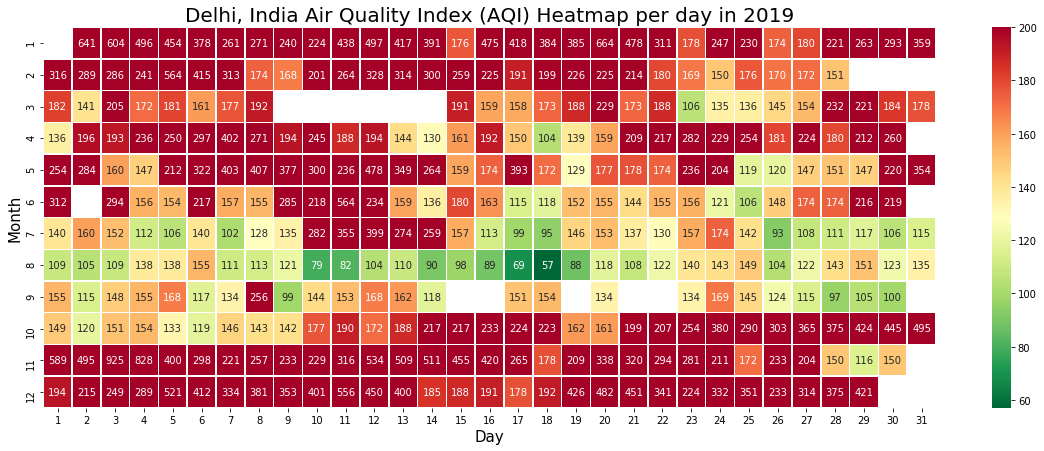

In [13]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(delhi_pivot2019, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
plt.title("Delhi, India Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DelhiAQI_CalendarHeatmap.png")

Text(0.5, 42.0, 'Day')

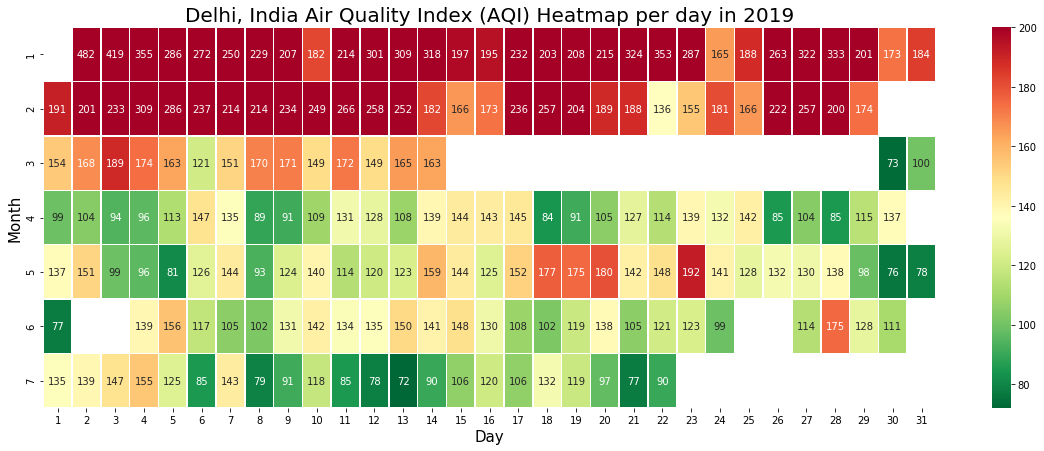

In [14]:
f1, ax1 = plt.subplots(figsize=(20, 7))
sns.heatmap(delhi_pivot2020, annot=True, fmt="g", linewidths=.5, ax=ax1, vmax=200, cmap = "RdYlGn_r")
plt.title("Delhi, India Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DelhiAQI_CalendarHeatmap.png")

### Line charts

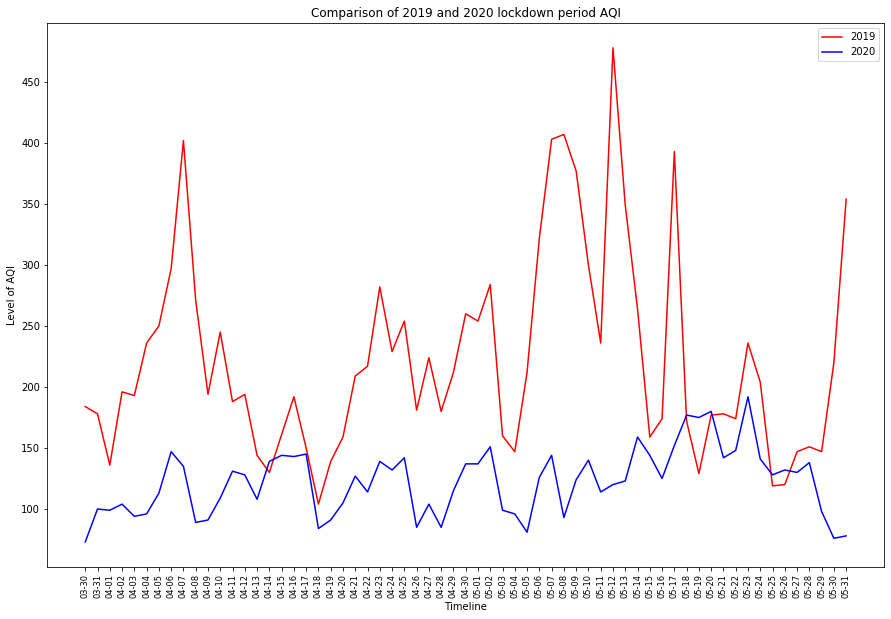

In [15]:
delhimerged = delhi_lockdown19.merge(delhi_lockdown20, on= "month_day")

x_axis=delhimerged["month_day"]
y_axis=delhimerged["AQI_x"]
x2=delhimerged["month_day"]
y2=delhimerged["AQI_y"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90, size='small')
plt.plot(x_axis,y_axis, color="red", label="2019")
plt.plot(x2,y2,color="blue", label="2020")
# Create a legend for our chart
plt.legend(loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

### Stacked Area Plot

In [16]:
index_delhi_19=delhi_lockdown19.set_index("date")
index_delhi_20=delhi_lockdown20.set_index("date")

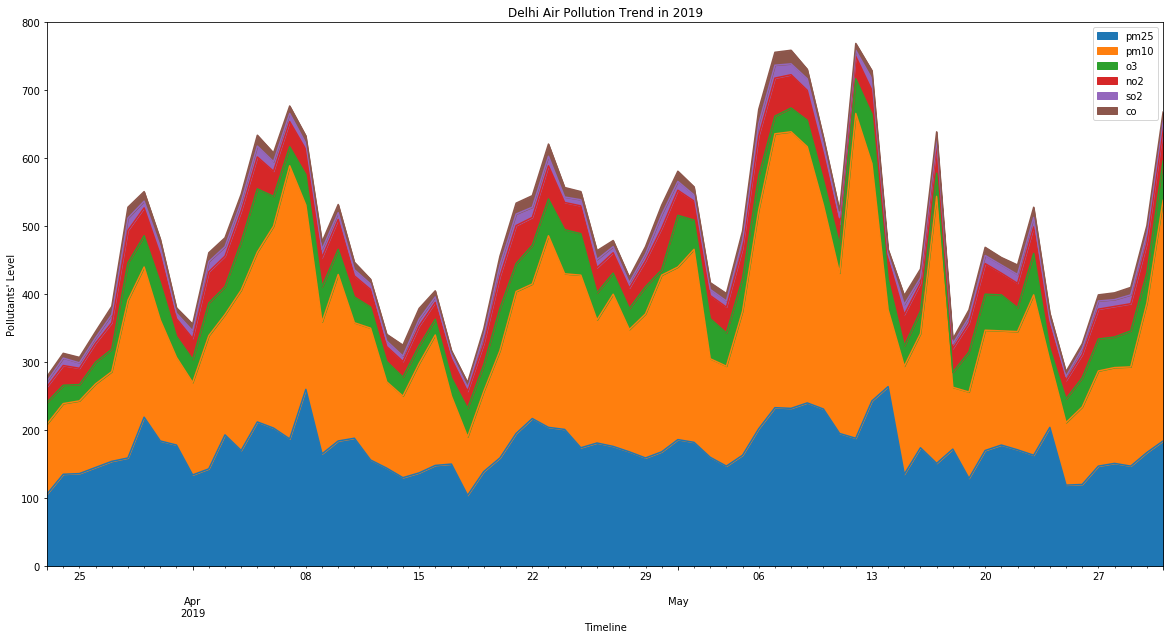

In [17]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_delhi_19[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,800)
# Creat tite, x and y label
plt.title("Delhi Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

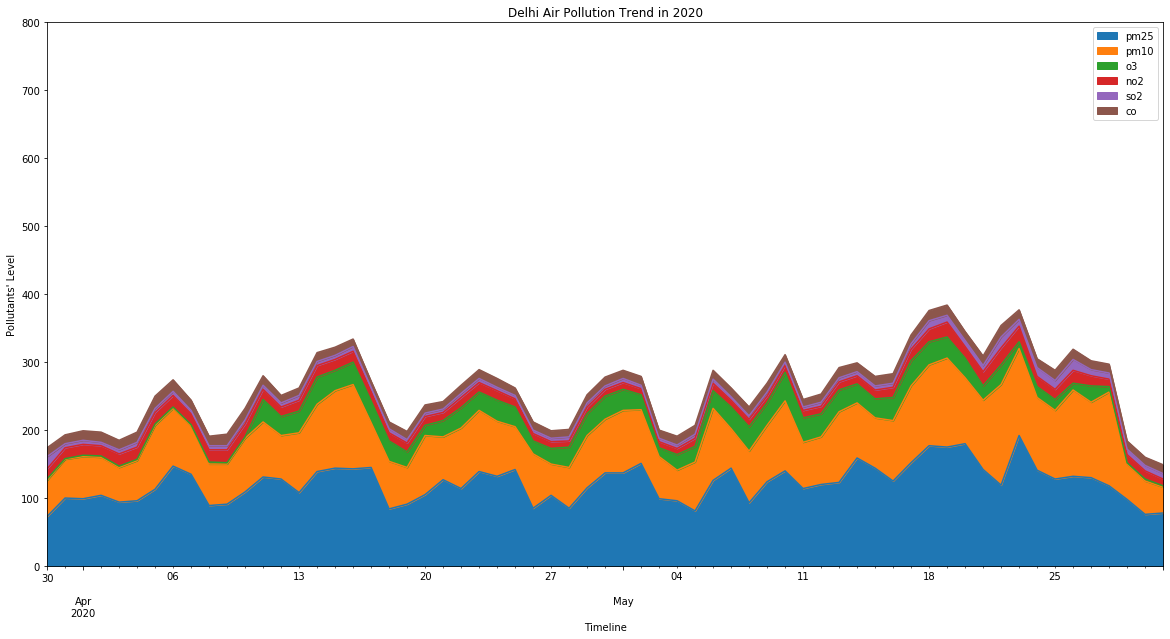

In [18]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_delhi_20[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,800)
# Creat tite, x and y label
plt.title("Delhi Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

### Treemap

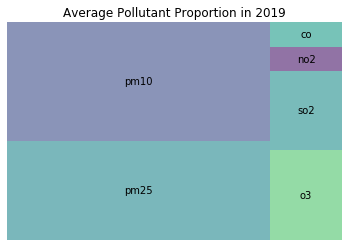

In [19]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=delhi_lockdown19.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2019")
plt.show()

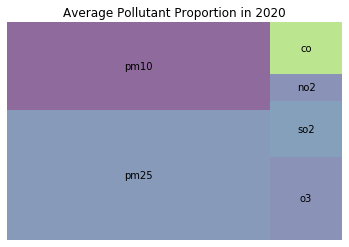

In [20]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=delhi_lockdown20.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2020")
plt.show()

PM10 and SO2 reduced the most comparing the 2 years

### Bar Chart

In [21]:
delhiapril19=delhi[(delhi['month']==4) &(delhi['year']==2019)]
delhimay19=delhi[(delhi['month']==5) &(delhi['year']==2019)]
delhiapril20=delhi[(delhi['month']==4) &(delhi['year']==2020)]
delhimay20=delhi[(delhi['month']==5) &(delhi['year']==2020)]

In [22]:
#grouped by health level april and may
delhigrouped_april19=delhiapril19.groupby("health level")
delhigrouped_may19=delhimay19.groupby("health level")
delhigrouped_april20=delhiapril20.groupby("health level")
delhigrouped_may20=delhimay20.groupby("health level")

In [23]:
#get vlaues for each bar
delhiapril19_count=delhigrouped_april19['date'].count().values
delhimay19_count=delhigrouped_may19['date'].count().values
delhiapril20_count=delhigrouped_april20['date'].count().values
delhimay20_count=delhigrouped_may20['date'].count().values

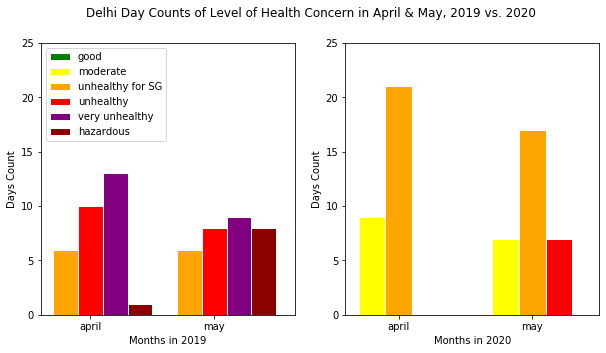

In [24]:
#plot bar charts
barWidth = 0.20

# set height of bar
bars13 = [delhiapril19_count[0], delhimay19_count[0]]
bars14 = [delhiapril19_count[1], delhimay19_count[1]]
bars15 = [delhiapril19_count[2], delhimay19_count[2]]
bars16 = [delhiapril19_count[3], delhimay19_count[3]]
bars17 = [delhiapril19_count[4], delhimay19_count[4]]
bars18 = [delhiapril19_count[5], delhimay19_count[5]]

# Set position of bar on X axis
r1 = np.arange(len(bars13))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
# Make the plot
ax1.bar(r1, bars13, color='green', width=barWidth, edgecolor='white', label='good')
ax1.bar(r2, bars14, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax1.bar(r3, bars15, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax1.bar(r4, bars16, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax1.bar(r5, bars17, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax1.bar(r6, bars18, color='darkred', width=barWidth, edgecolor='white', label='hazardous')


ax1.set_xticks([0.6,1.6])
ax1.set_xticklabels(["april", "may"])

# Create legend & Show graphic
ax1.legend(loc = "upper left")

ax1.set(xlabel='Months in 2019', ylabel='Days Count')

ax1.set_ylim(0, 25)
ax1.set_xlim(.2, 2.25)

bars19 = [delhiapril20_count[0], delhimay20_count[0]]
bars20 = [delhiapril20_count[1], delhimay20_count[1]]
bars21 = [delhiapril20_count[2], delhimay20_count[2]]
bars22 = [delhiapril20_count[3], delhimay20_count[3]]
bars23 = [delhiapril20_count[4], delhimay20_count[4]]
bars24 = [delhiapril20_count[5], delhimay20_count[5]]

ax2.bar(r1, bars19, color='green', width=barWidth, edgecolor='white', label='good')
ax2.bar(r2, bars20, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax2.bar(r3, bars21, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax2.bar(r4, bars22, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax2.bar(r5, bars23, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax2.bar(r6, bars24, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

# Add xticks on the middle of the group bars

ax2.set_xticks([0.4,1.4])
ax2.set_xticklabels(["april", "may"])


ax2.set(xlabel='Months in 2020', ylabel='Days Count')

ax2.set_ylim(0, 25)
ax2.set_xlim(0, 1.9)

fig.suptitle("Delhi Day Counts of Level of Health Concern in April & May, 2019 vs. 2020")
plt.show()


In [25]:
#Emily's Pie charts
#grouped the dataframe by health level and count the days in each category
#this group has no may: only the lockdown period. delhi lockdown to May 1st
delhigrouped19=delhi_lockdown19.groupby("health level")
delhidate_count19=delhigrouped19["date"].count()

delhigrouped20=delhi_lockdown20.groupby("health level")
delhidate_count20=delhigrouped20["date"].count()


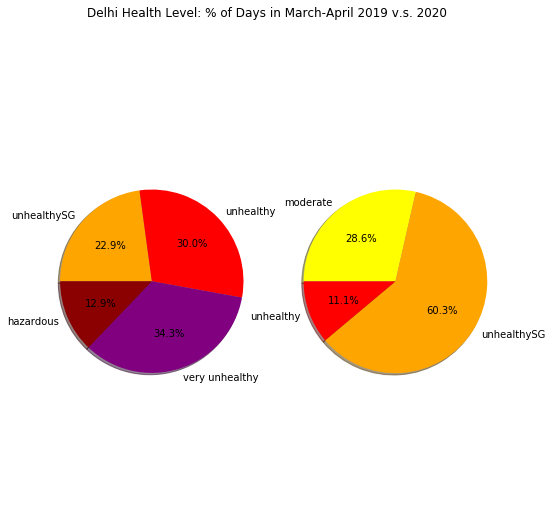

In [26]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
delhilabels19 = ["unhealthySG","unhealthy","very unhealthy","hazardous"]
delhilabels20 = ["moderate","unhealthySG","unhealthy"]


delhipie_values19=[x for x in delhidate_count19.values if x!=0]
delhipie_values20=[x for x in delhidate_count20.values if x!=0]

delhicolors19=['orange','red','purple','darkred']
delhicolors20=['yellow','orange','red']


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.pie(delhipie_values19, labels=delhilabels19, colors=delhicolors19,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax2.pie(delhipie_values20, labels=delhilabels20, colors=delhicolors20,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle('Delhi Health Level: % of Days in March-April 2019 v.s. 2020')


plt.show()

# Diepkloof

### Calendar heatmap

In [27]:
diepkloof_full2019=diepkloof.loc[diepkloof['year']==2019]
diepkloof_full2020=diepkloof.loc[diepkloof['year']==2020]

diepkloof_pivot2019 = diepkloof_full2019.pivot_table('AQI','month','day')
diepkloof_pivot2020 = diepkloof_full2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

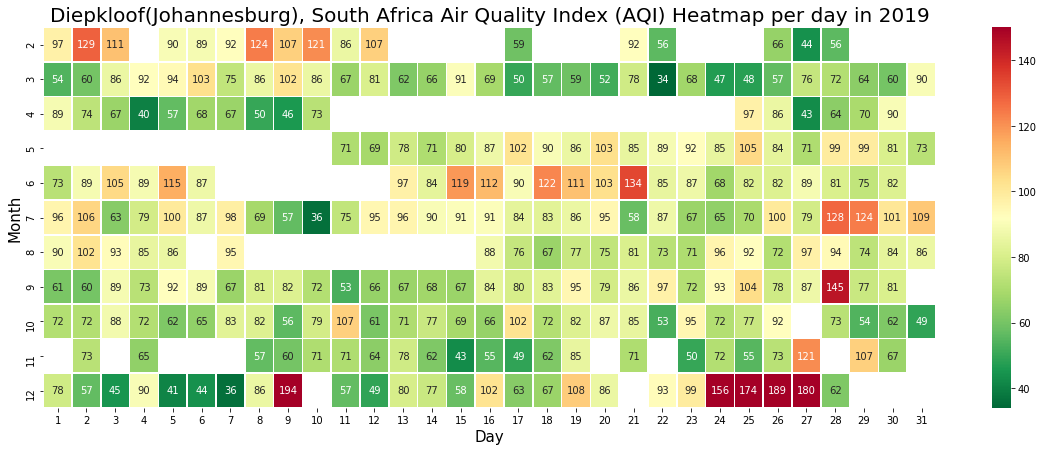

In [28]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(diepkloof_pivot2019, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("Diepkloof(Johannesburg), South Africa Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DiepkloofAQI_CalendarHeatmap.png")

Text(0.5, 42.0, 'Day')

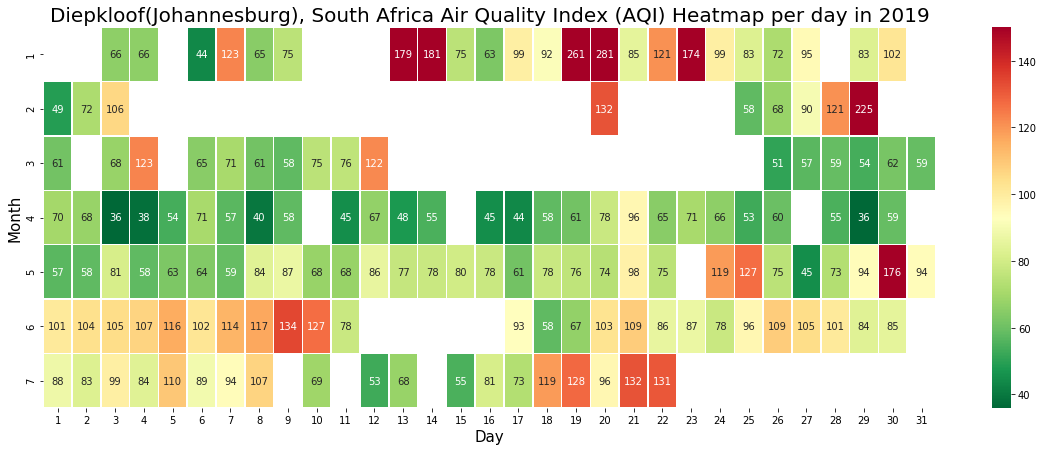

In [29]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(diepkloof_pivot2020, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("Diepkloof(Johannesburg), South Africa Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_DiepkloofAQI_CalendarHeatmap.png")

### Line Plot

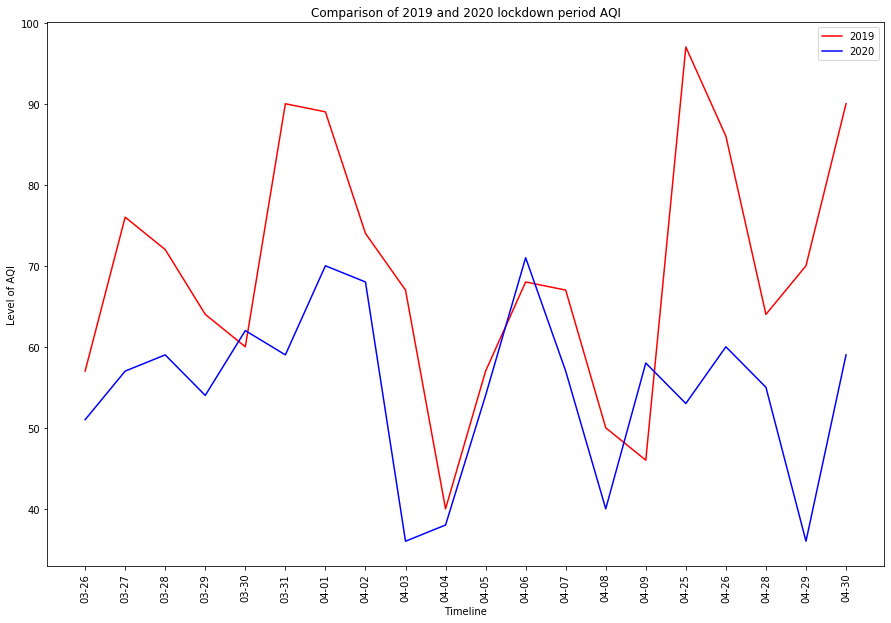

In [30]:
diepkloofmerged = diepkloof_lockdown19.merge(diepkloof_lockdown20, on= "month_day")

xdie1=diepkloofmerged["month_day"]
ydie1=diepkloofmerged["AQI_x"]
xdie2=diepkloofmerged["month_day"]
ydie2=diepkloofmerged["AQI_y"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
diepkloof_2019, = plt.plot(xdie1,ydie1, color="red", label="2019")
diepkloof_2020, = plt.plot(xdie2,ydie2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[diepkloof_2019, diepkloof_2020], loc="best")
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

### Stacked Area Plot

In [31]:
index_diepkloof_19=diepkloof_lockdown19.set_index("date")
index_diepkloof_20=diepkloof_lockdown20.set_index("date")

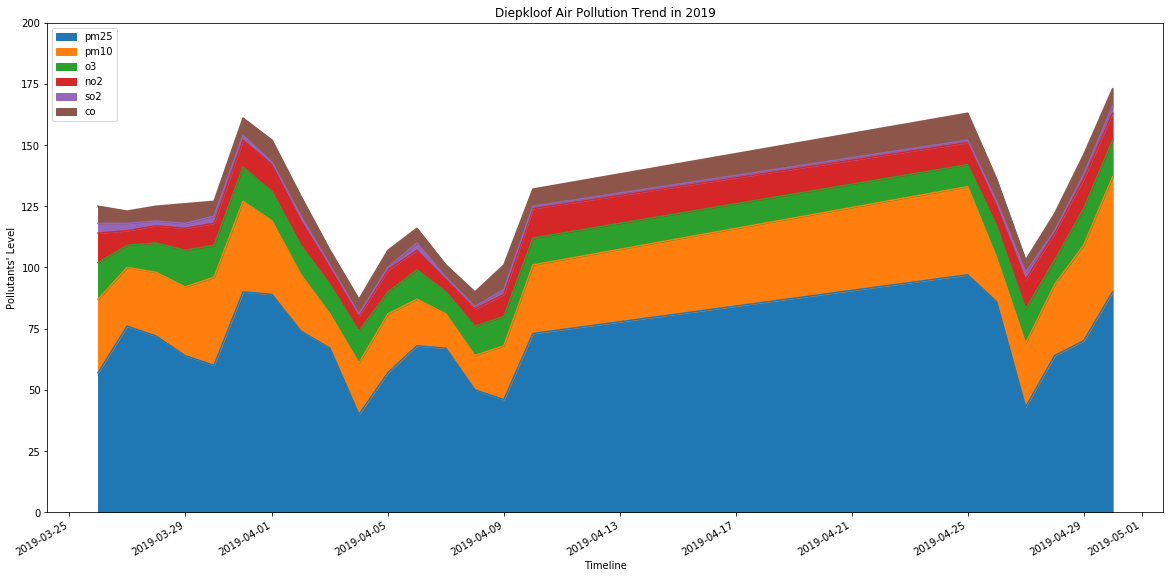

In [32]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_diepkloof_19[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,200)
# Creat tite, x and y label
plt.title("Diepkloof Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()


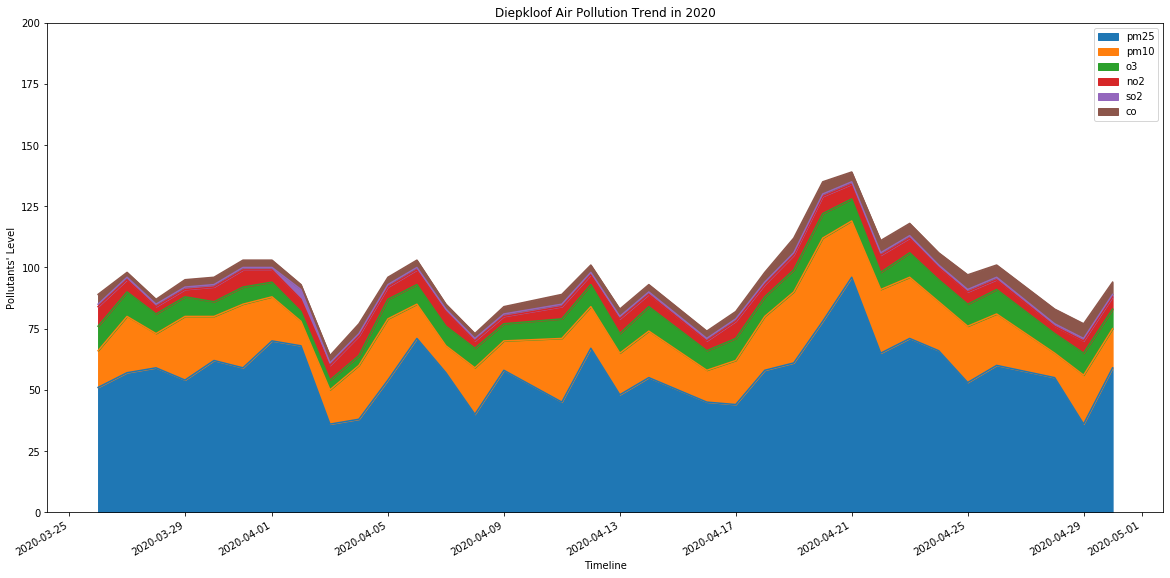

In [33]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_diepkloof_20[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,200)
# Creat tite, x and y label
plt.title("Diepkloof Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

### Treemap

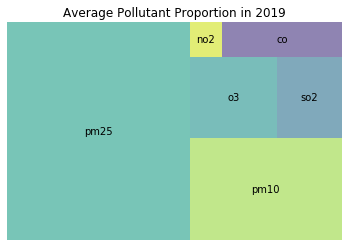

In [34]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=diepkloof_lockdown19.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2019")
plt.show()

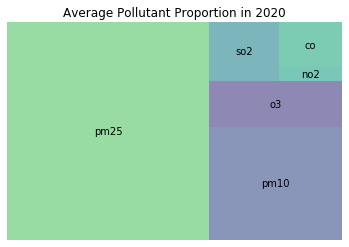

In [35]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=diepkloof_lockdown20.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2020")
plt.show()

SO2 and CO reduced the most comparing the 2 years

### Bar charts (day counts of health level 2019 vs. 2020)

In [36]:
diepkloofapril19=diepkloof[(diepkloof['month']==4) &(diepkloof['year']==2019)]
diepkloofapril20=diepkloof[(diepkloof['month']==4) &(diepkloof['year']==2020)]

In [37]:
#grouped by health level april
diepkloofgrouped_april19=diepkloofapril19.groupby("health level")
diepkloofgrouped_april20=diepkloofapril20.groupby("health level")

In [38]:
#get vlaues for each bar
diepkloofapril19_count=diepkloofgrouped_april19['date'].count().values
diepkloofapril20_count=diepkloofgrouped_april20['date'].count().values

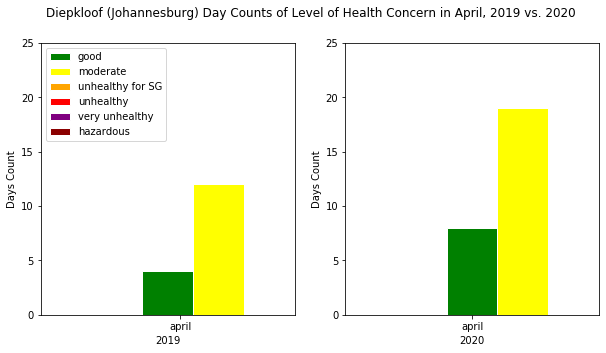

In [39]:
barWidth = 0.40


# set height of bar
bars1 = [diepkloofapril19_count[0]]
bars2 = [diepkloofapril19_count[1]]
bars3 = [diepkloofapril19_count[2]]
bars4 = [diepkloofapril19_count[3]]
bars5 = [diepkloofapril19_count[4]]
bars6 = [diepkloofapril19_count[5]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
# Make the plot
ax1.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='good')
ax1.bar(r2, bars2, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax1.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax1.bar(r4, bars4, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax1.bar(r5, bars5, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax1.bar(r6, bars6, color='darkred', width=barWidth, edgecolor='white', label='hazardous')


ax1.set_xticks([0.1])
ax1.set_xticklabels(["april"])

# Create legend & Show graphic
ax1.legend(loc = "upper left")

ax1.set(xlabel='2019', ylabel='Days Count')

ax1.set_ylim(0, 25)
ax1.set_xlim(-1, 1)

bars7 = [diepkloofapril20_count[0]]
bars8 = [diepkloofapril20_count[1]]
bars9 = [diepkloofapril20_count[2]]
bars10 = [diepkloofapril20_count[3]]
bars11 = [diepkloofapril20_count[4]]
bars12 = [diepkloofapril20_count[5]]

ax2.bar(r1, bars7, color='green', width=barWidth, edgecolor='white', label='good')
ax2.bar(r2, bars8, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax2.bar(r3, bars9, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax2.bar(r4, bars10, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax2.bar(r5, bars11, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax2.bar(r6, bars12, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

# Add xticks on the middle of the group bars

ax2.set_xticks([0])
ax2.set_xticklabels(["april"])


ax2.set(xlabel='2020', ylabel='Days Count')

ax2.set_ylim(0, 25)
ax2.set_xlim(-1,1)

fig.suptitle("Diepkloof (Johannesburg) Day Counts of Level of Health Concern in April, 2019 vs. 2020")
plt.show()



### Pie charts (percentage of days of heath level 2019 vs. 2020)

In [40]:
diepkloofgrouped19=diepkloof_lockdown19.groupby("health level")
diepkloofdate_count19=diepkloofgrouped19["date"].count()

diepkloofgrouped20=diepkloof_lockdown20.groupby("health level")
diepkloofdate_count20=diepkloofgrouped20["date"].count()

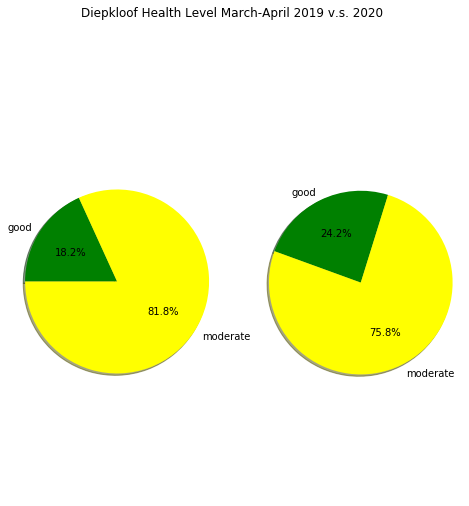

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
diepklooflabels19 = ["good","moderate"]
diepklooflabels20 = ["good","moderate"]

diepkloofpie_values19=[x for x in diepkloofdate_count19.values if x!=0]
diepkloofpie_values20=[x for x in diepkloofdate_count20.values if x!=0]

diepkloofcolors19=["green",'yellow']
diepkloofcolors20=['green','yellow']


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.pie(diepkloofpie_values19, labels=diepklooflabels19, colors=diepkloofcolors19,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax2.pie(diepkloofpie_values20, labels=diepklooflabels20, colors=diepkloofcolors20,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=160)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle('Diepkloof Health Level March-April 2019 v.s. 2020')


plt.show()

# Wuhan

### Calendar Heatmap

In [42]:
wuhan_full2019=wuhan.loc[wuhan['year']==2019]
wuhan_full2020=wuhan.loc[wuhan['year']==2020]

wuhan_pivot2019 = wuhan_full2019.pivot_table('AQI','month','day')
wuhan_pivot2020 = wuhan_full2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

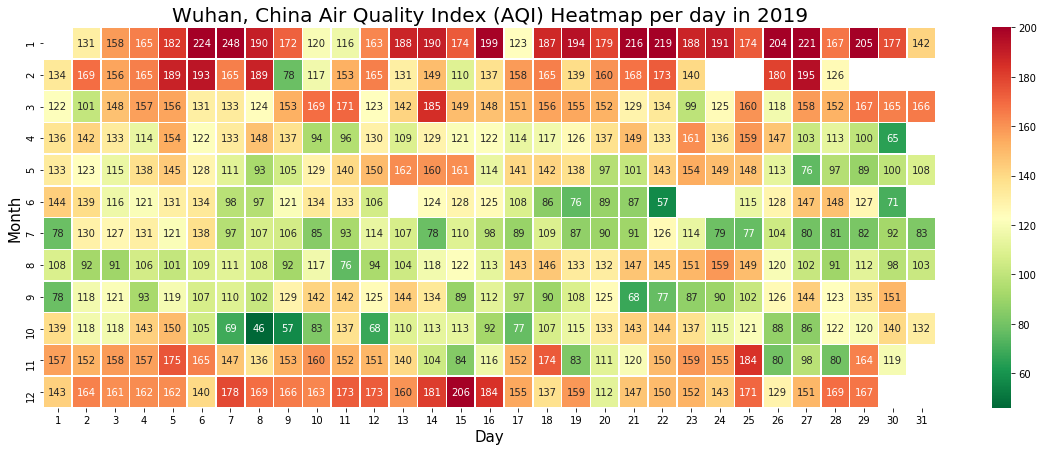

In [43]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(wuhan_pivot2019, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
plt.title("Wuhan, China Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_WuhanAQI_CalendarHeatmap.png")

Text(0.5, 42.0, 'Day')

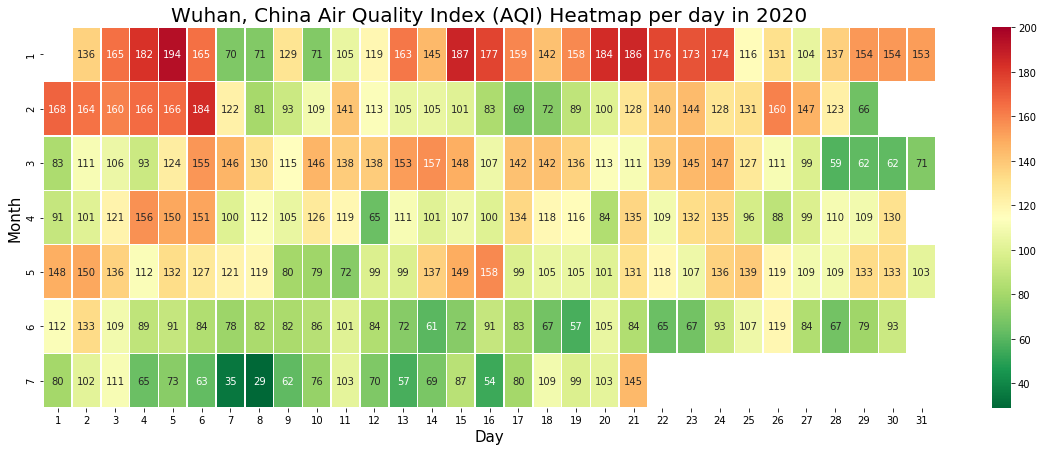

In [44]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(wuhan_pivot2020, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
plt.title("Wuhan, China Air Quality Index (AQI) Heatmap per day in 2020", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2020_WuhanAQI_CalendarHeatmap.png")

### Line Plot

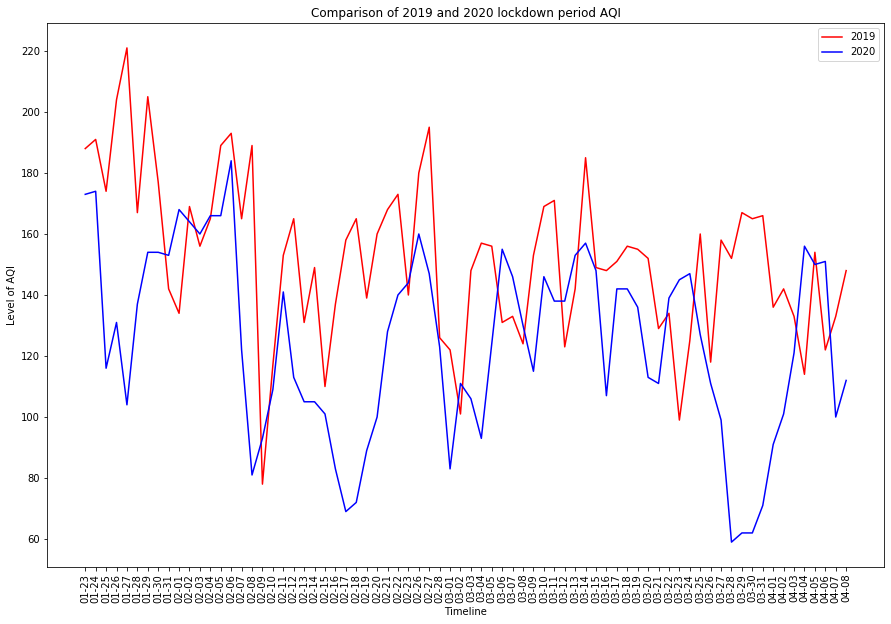

In [45]:
wuhanmerged = wuhan_lockdown19.merge(wuhan_lockdown20, on= "month_day")

#Create a line plot that compares AQI for lockdown periods between 2019 and 2020
x_axis=wuhanmerged["month_day"]
y_axis=wuhanmerged["AQI_x"]
x2=wuhanmerged["month_day"]
y2=wuhanmerged["AQI_y"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
wuhan_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
wuhan_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[wuhan_2019, wuhan_2020], loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

### Stacked Area Plot

In [46]:
index_wuhan_19=wuhan_lockdown19.set_index("date")
index_wuhan_20=wuhan_lockdown20.set_index("date")

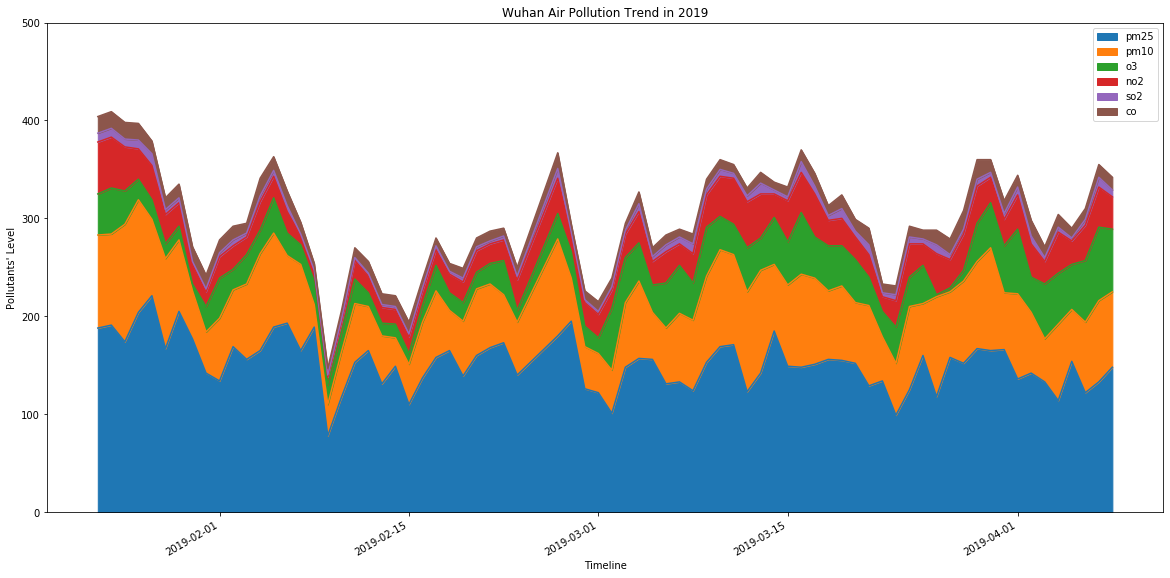

In [47]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_wuhan_19[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,500)
# Creat tite, x and y label
plt.title("Wuhan Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

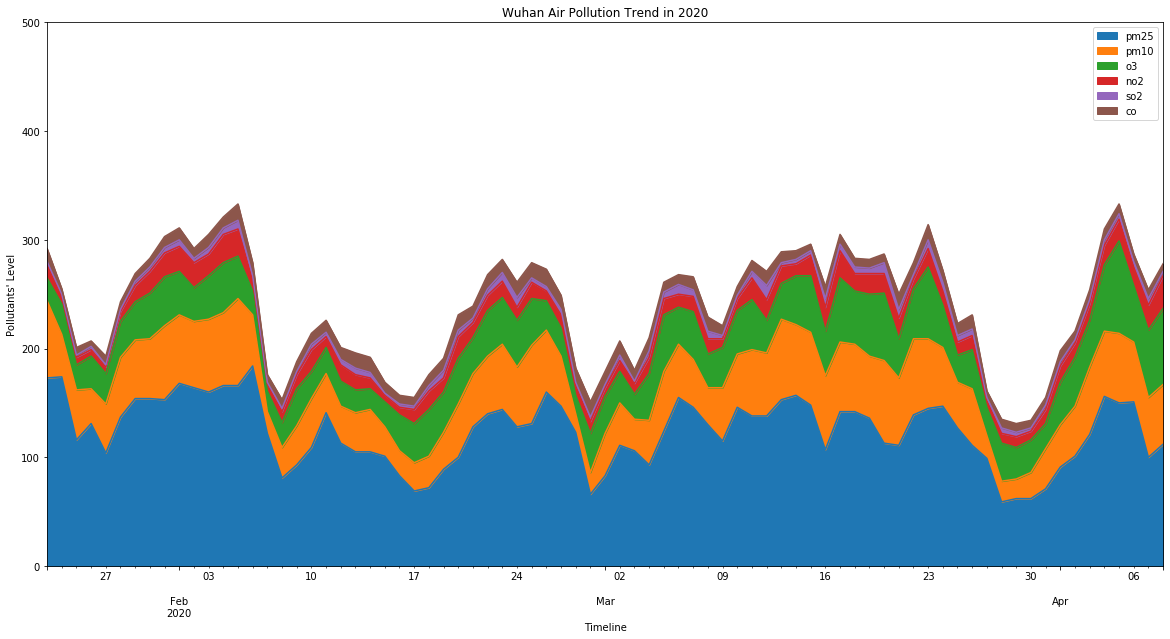

In [48]:
# Create an stacked area chart for the pollutant levels in 2019
ax = index_wuhan_20[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,500)
# Creat tite, x and y label
plt.title("Wuhan Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

### Treemap

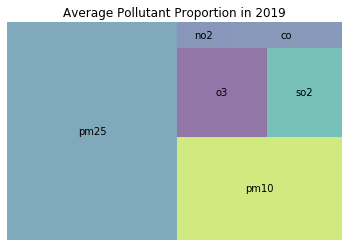

In [49]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=wuhan_lockdown19.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2019")
plt.show()

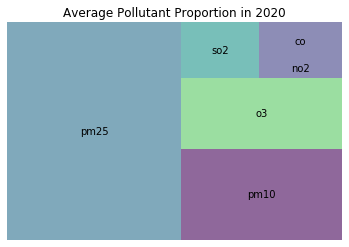

In [50]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=wuhan_lockdown20.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.title("Average Pollutant Proportion in 2020")
plt.show()

SO2 reduced the most comparing the 2 years

### Bar Chart

In [51]:
wuhanfeb19=wuhan[(wuhan['month']==2) &(wuhan['year']==2019)]
wuhanmarch19=wuhan[(wuhan['month']==3) &(wuhan['year']==2019)]
wuhanfeb20=wuhan[(wuhan['month']==2) &(wuhan['year']==2020)]
wuhanmarch20=wuhan[(wuhan['month']==3) &(wuhan['year']==2020)]

In [52]:
#grouped by health level febuary and march
wuhangrouped_feb19=wuhanfeb19.groupby("health level")
wuhangrouped_march19=wuhanmarch19.groupby("health level")
wuhangrouped_feb20=wuhanfeb20.groupby("health level")
wuhangrouped_march20=wuhanmarch20.groupby("health level")

In [53]:
#get vlaues for each bar
wuhanfeb19_count=wuhangrouped_feb19['date'].count().values
wuhanmarch19_count=wuhangrouped_march19['date'].count().values
wuhanfeb20_count=wuhangrouped_feb20['date'].count().values
wuhanmarch20_count=wuhangrouped_march20['date'].count().values

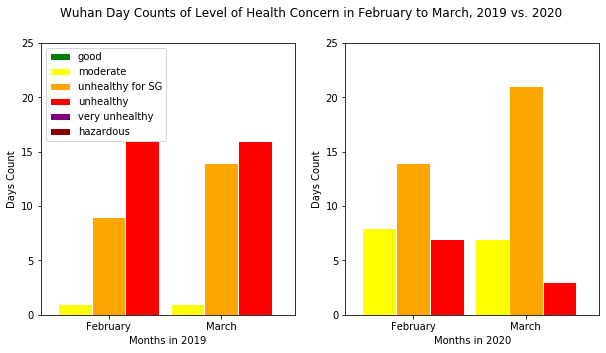

In [54]:

# set width of bar
barWidth = 0.30

# set height of bar
bars37 = [wuhanfeb19_count[0], wuhanmarch19_count[0]]
bars38= [wuhanfeb19_count[1], wuhanmarch19_count[1]]
bars39= [wuhanfeb19_count[2], wuhanmarch19_count[2]]
bars40= [wuhanfeb19_count[3], wuhanmarch19_count[3]]
bars41= [wuhanfeb19_count[4], wuhanmarch19_count[4]]
bars42= [wuhanfeb19_count[5], wuhanmarch19_count[5]]

# Set position of bar on X axis
r1 = np.arange(len(bars37))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
# Make the plot
ax1.bar(r1, bars37, color='green', width=barWidth, edgecolor='white', label='good')
ax1.bar(r2, bars38, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax1.bar(r3, bars39, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax1.bar(r4, bars40, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax1.bar(r5, bars41, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax1.bar(r6, bars42, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

# Add xticks on the middle of the group bars
# plt.xticks([0.4, 1.4])

ax1.set_xticks([0.6,1.6])
ax1.set_xticklabels(["February", "March"])

# Create legend & Show graphic
ax1.legend(loc = "upper left")

ax1.set(xlabel='Months in 2019', ylabel='Days Count')

ax1.set_ylim(0, 25)
ax1.set_xlim(0, 2.25)

bars43 = [wuhanfeb20_count[0], wuhanmarch20_count[0]]
bars44 = [wuhanfeb20_count[1], wuhanmarch20_count[1]]
bars45= [wuhanfeb20_count[2], wuhanmarch20_count[2]]
bars46 = [wuhanfeb20_count[3], wuhanmarch20_count[3]]
bars47 = [wuhanfeb20_count[4], wuhanmarch20_count[4]]
bars48 = [wuhanfeb20_count[5], wuhanmarch20_count[5]]

ax2.bar(r1, bars43, color='green', width=barWidth, edgecolor='white', label='good')
ax2.bar(r2, bars44, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax2.bar(r3, bars45, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax2.bar(r4, bars46, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax2.bar(r5, bars47, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax2.bar(r6, bars48, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

# Add xticks on the middle of the group bars

ax2.set_xticks([0.6,1.6])
ax2.set_xticklabels(["February", "March"])


ax2.set(xlabel='Months in 2020', ylabel='Days Count')

ax2.set_ylim(0, 25)
ax2.set_xlim(0, 2.25)

fig.suptitle("Wuhan Day Counts of Level of Health Concern in February to March, 2019 vs. 2020")
plt.show()

### Pie charts (percentage of days of heath level 2019 vs. 2020)

In [55]:
wuhangrouped19=wuhan_lockdown19.groupby("health level")
wuhandate_count19=wuhangrouped19["date"].count()

wuhangrouped20=wuhan_lockdown20.groupby("health level")
wuhandate_count20=wuhangrouped20["date"].count()

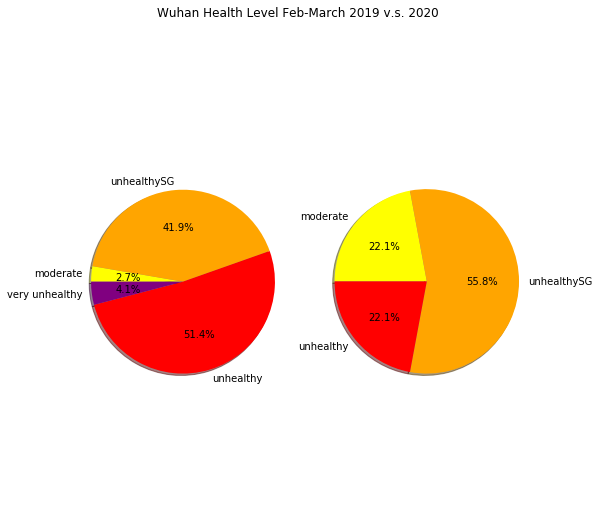

In [56]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
wuhanlabels19 = ["moderate","unhealthySG","unhealthy","very unhealthy"]
wuhanlabels20 = ["moderate","unhealthySG","unhealthy"]

wuhanpie_values19=[x for x in wuhandate_count19.values if x!=0]
wuhanpie_values20=[x for x in wuhandate_count20.values if x!=0]

wuhancolors19=['yellow','orange','red','purple']
wuhancolors20=['yellow','orange','red']


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.pie(wuhanpie_values19, labels=wuhanlabels19, colors=wuhancolors19,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax2.pie(wuhanpie_values20, labels=wuhanlabels20, colors=wuhancolors20,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle('Wuhan Health Level Feb-March 2019 v.s. 2020')


plt.show()

# London

### Calendar Heatmap

In [57]:
london_full2019=london.loc[london['year']==2019]
london_full2020=london.loc[london['year']==2020]

london_pivot2019 = london_full2019.pivot_table('AQI','month','day')
london_pivot2020 = london_full2020.pivot_table('AQI','month','day')

Text(0.5, 42.0, 'Day')

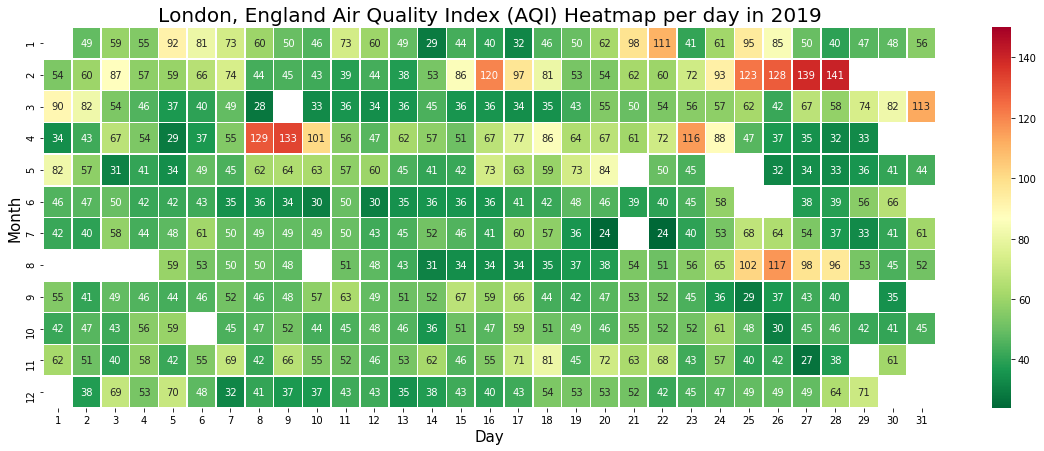

In [58]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(london_pivot2019, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("London, England Air Quality Index (AQI) Heatmap per day in 2019", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2019_LondonAQI_CalendarHeatmap.png")


Text(0.5, 42.0, 'Day')

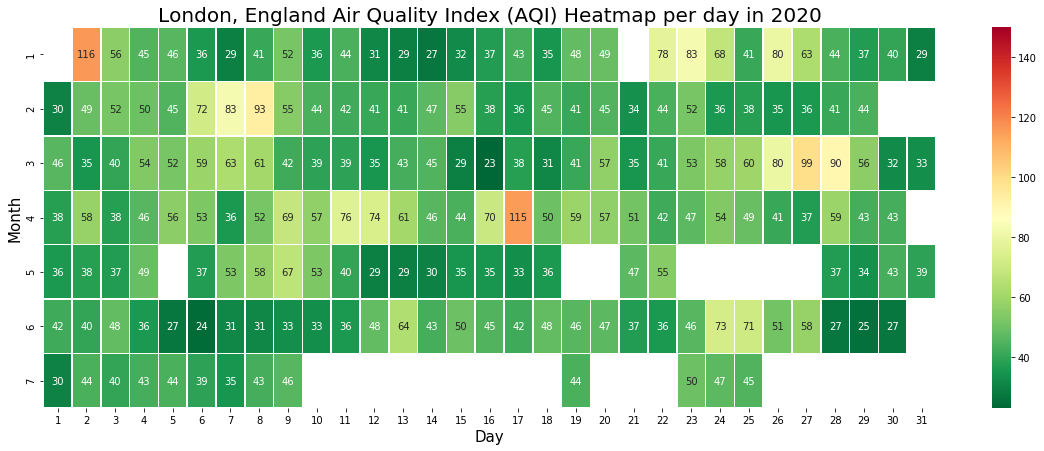

In [59]:
f1, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(london_pivot2020, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=150, cmap = "RdYlGn_r")
plt.title("London, England Air Quality Index (AQI) Heatmap per day in 2020", fontsize=20)
plt.ylabel("Month", fontsize=15)
plt.xlabel("Day", fontsize=15)
#plt.savefig("2020_LondonAQI_CalendarHeatmap.png")

### Line Plot

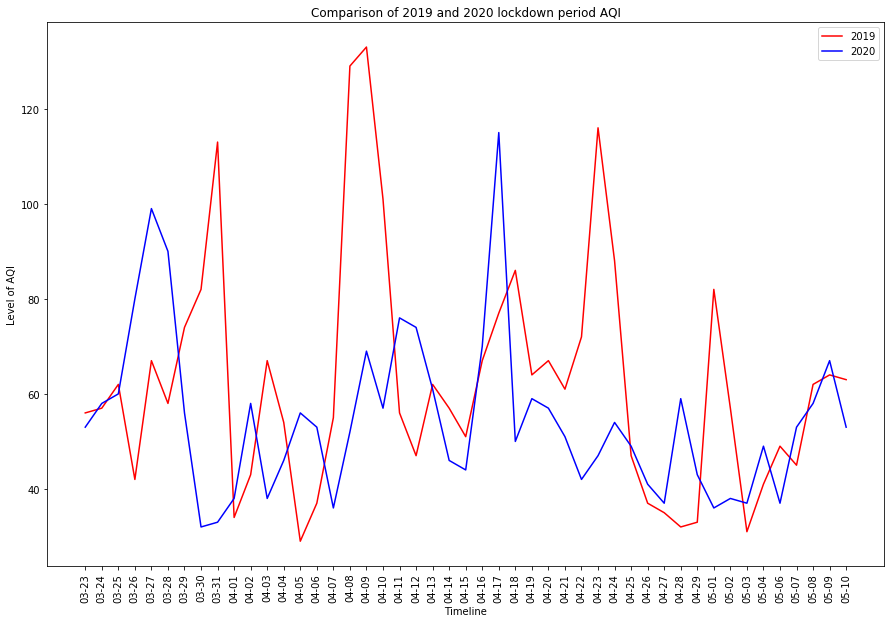

In [60]:
londonmerged = london_lockdown19.merge(london_lockdown20, on= "month_day")

x_axis=londonmerged["month_day"]
y_axis=londonmerged["AQI_x"]
x2=londonmerged["month_day"]
y2=londonmerged["AQI_y"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
london_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
london_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our plot
plt.legend(handles=[london_2019, london_2020], loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()


### Stacked Area Plot

In [61]:
index_london_19=london_lockdown19.set_index("date")
index_london_20=london_lockdown20.set_index("date")

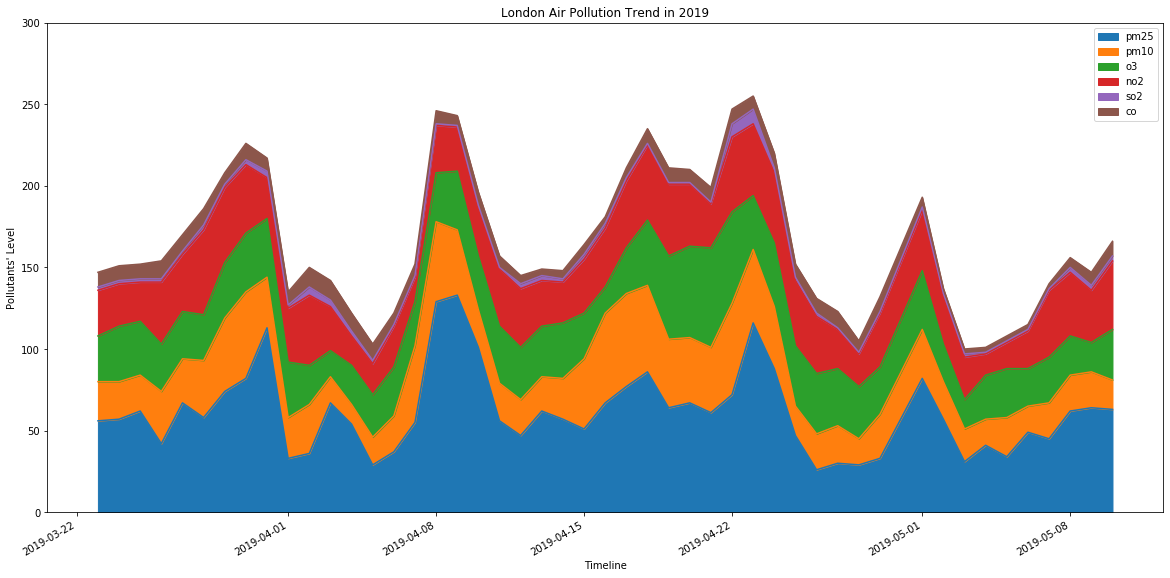

In [62]:
# Create an stacked area chart for the pollutant levels in 2019
ax=index_london_19[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,300)
# Creat tite, x and y label
plt.title("London Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

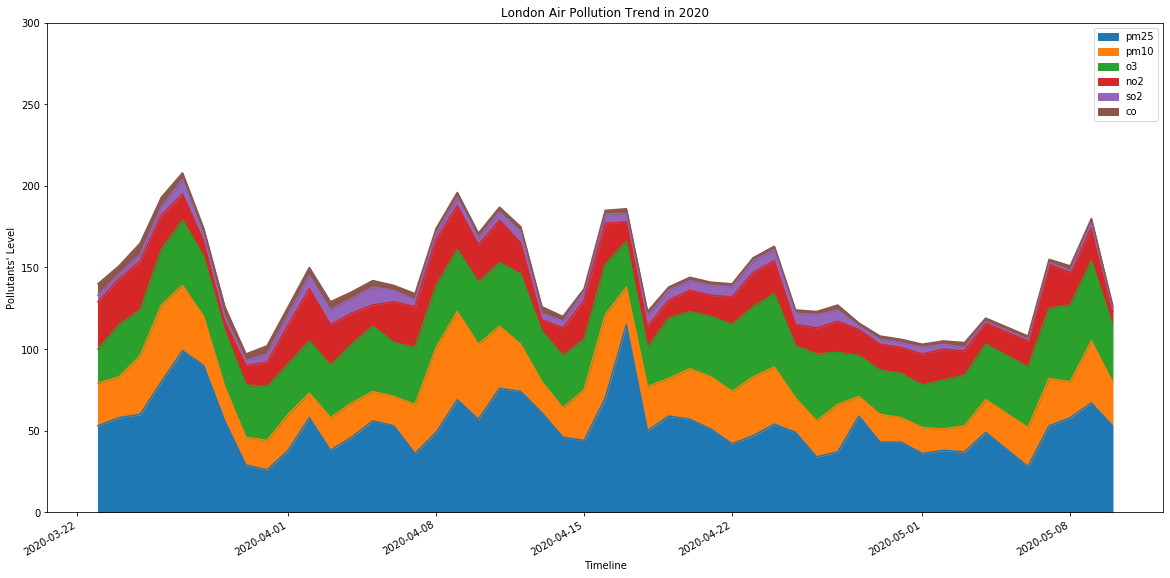

In [63]:
# Create an stacked area chart for the pollutant levels in lockdown 2020
ax=index_london_20[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,300)
# Creat tite, x and y label
plt.title("London Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

### Treemap

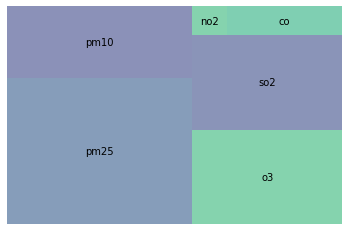

In [64]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=london_lockdown19.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()

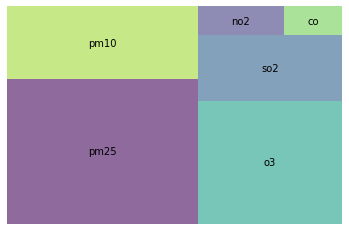

In [65]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=london_lockdown20.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()

SO2 and CO reduced the most comparing the 2 years

### Bar Chart

In [66]:
londonapril19=london[(london['month']==4) &(london['year']==2019)]
londonapril20=london[(london['month']==4) &(london['year']==2020)]

In [67]:
#grouped by health level april and may
londongrouped_april19=londonapril19.groupby("health level")
londongrouped_april20=londonapril20.groupby("health level")

In [68]:
#get vlaues for each bar
londonapril19_count=londongrouped_april19['date'].count().values
londonapril20_count=londongrouped_april20['date'].count().values

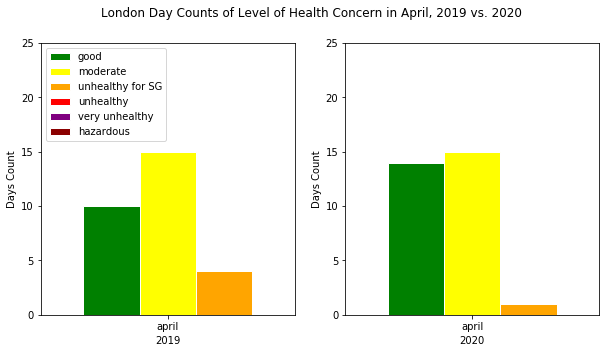

In [69]:
barWidth = 0.20

# set height of bar
bars25 = [londonapril19_count[0]]
bars26 = [londonapril19_count[1]]
bars27 = [londonapril19_count[2]]
bars28 = [londonapril19_count[3]]
bars29 = [londonapril19_count[4]]
bars30 = [londonapril19_count[5]]

# Set position of bar on X axis
r1 = np.arange(len(bars25))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
# Make the plot
ax1.bar(r1, bars25, color='green', width=barWidth, edgecolor='white', label='good')
ax1.bar(r2, bars26, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax1.bar(r3, bars27, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax1.bar(r4, bars28, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax1.bar(r5, bars29, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax1.bar(r6, bars30, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

ax1.set_xticks([0.2])
ax1.set_xticklabels(["april"])

# Create legend & Show graphic
ax1.legend(loc = "upper left")

ax1.set(xlabel='2019', ylabel='Days Count')

ax1.set_ylim(0, 25)
ax1.set_xlim(-0.25, .65)

bars31 = [londonapril20_count[0]]
bars32 = [londonapril20_count[1]]
bars33 = [londonapril20_count[2]]
bars34 = [londonapril20_count[3]]
bars35 = [londonapril20_count[4]]
bars36 = [londonapril20_count[5]]

ax2.bar(r1, bars31, color='green', width=barWidth, edgecolor='white', label='good')
ax2.bar(r2, bars32, color='yellow', width=barWidth, edgecolor='white', label='moderate')
ax2.bar(r3, bars33, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
ax2.bar(r4, bars34, color='red', width=barWidth, edgecolor='white', label='unhealthy')
ax2.bar(r5, bars35, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
ax2.bar(r6, bars36, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

# Add xticks on the middle of the group bars

ax2.set_xticks([.2])
ax2.set_xticklabels(["april"])


ax2.set(xlabel='2020', ylabel='Days Count')

ax2.set_ylim(0, 25)
ax2.set_xlim(-0.25, 0.65)

fig.suptitle("London Day Counts of Level of Health Concern in April, 2019 vs. 2020")
plt.show()


### Pie charts (percentage of days of heath level 2019 vs. 2020)

In [70]:
londongrouped19=london_lockdown19.groupby("health level")
londondate_count19=londongrouped19["date"].count()

londongrouped20=london_lockdown20.groupby("health level")
londondate_count20=londongrouped20["date"].count()

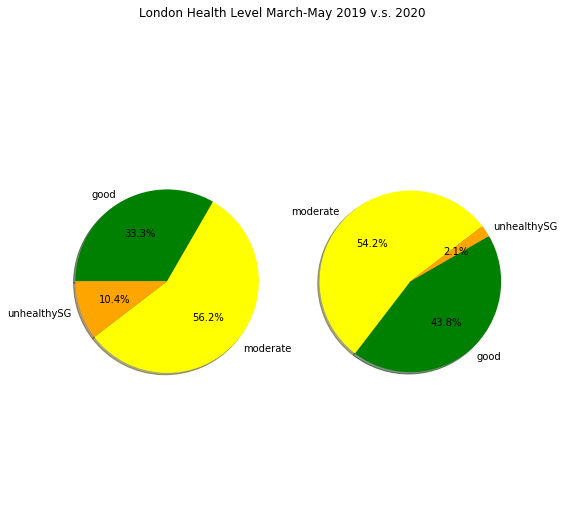

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
londonlabels = ["good","moderate","unhealthySG"]


londonpie_values19=[x for x in londondate_count19.values if x!=0]
londonpie_values20=[x for x in londondate_count20.values if x!=0]

londoncolors=['green','yellow','orange']



fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.pie(londonpie_values19, labels=londonlabels, colors=londoncolors,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax2.pie(londonpie_values20, labels=londonlabels, colors=londoncolors,counterclock=False,autopct='%1.1f%%',
        shadow=True, startangle=30)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle('London Health Level March-May 2019 v.s. 2020')


plt.show()

# .gmaps to Show All Cites & AQI Changes

In [72]:
#Average AQI increase/decrease
wuhanAQIchange="{:.2%}".format(((wuhan_lockdown19['AQI'].mean()-wuhan_lockdown20['AQI'].mean())/wuhan_lockdown19['AQI'].mean()))

delhiAQIchange="{:.2%}".format(((delhi_lockdown20['AQI'].mean()-delhi_lockdown19['AQI'].mean())/delhi_lockdown19['AQI'].mean()))

londonAQIchange="{:.2%}".format(((london_lockdown20['AQI'].mean()-london_lockdown19['AQI'].mean())/london_lockdown19['AQI'].mean()))

diepkloofAQIchange="{:.2%}".format(((diepkloof_lockdown20['AQI'].mean()-diepkloof_lockdown19['AQI'].mean())/diepkloof_lockdown19['AQI'].mean()))


In [73]:
change_df=pd.DataFrame({"City":["Wuhan","New Delhi","London","Diepkloof"],
                        "Country":["China","India","UK","South Africa"],
                        "AQIchange":[wuhanAQIchange,delhiAQIchange,londonAQIchange,diepkloofAQIchange]})
change_df

,City,Country,AQIchange
0,Wuhan,China,18.43%
1,New Delhi,India,-43.51%
2,London,UK,-12.30%
3,Diepkloof,South Africa,-15.73%


In [74]:
# NOTE: Do not change any of the code in this cell
locations=[(30.5928,114.3055),(28.7041,77.1025),(51.5074,-0.1278),(-26.2429,27.9497)]
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>AQIChange</dt><dd>{AQIchange}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
city_info = [info_box_template.format(**row) for index, row in change_df.iterrows()]

#set the map frame
fig = gmaps.figure(center=(10.0,-5.0),zoom_level=2)
#assign markers with info boxes
marker_layer = gmaps.marker_layer(locations,info_box_content=city_info)
# Add marker layer ontop of heat map
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))